# Primeros pasos con python y Jupyter Notebook

Como introducción a python y Jupyter, tomaremos ejemplos del libro "blueprints for Text Analysis using Python" que nos presentará en su inicio la base para el procesamiento de lenguaje natural, junto con las librerías y herramientas más elementales y una fácil comprensión de la información mostrando por pantalla distintas gráficas y tablas con la información deseada. 

Como primer paso, crearemos en el directorio en el que se encuentra nuestro notebook un archivo setup.py. Este archivo define e importa las librerías básicas que serán necesarias para el desarrollo del notebook, además de las rutas a directorios o archivos que vayamos a utilizar.

También cargaremos el archivo "settings.py" tomado directamente del repositorio proporcionado por los autores del libro. Este archivo proporciona características útiles para las herramientas que se van a utilizar. La ubicación de este archivo se encontrará en el directorio principal del proyecto, pues es común para todas las herramientas que se van a utilizar.

In [1]:
import sys, os

#Carga del archivo setup.py
%run -i setup.py

#Carga del archivo settings.py
#%run "$BASE_DIR/settings.py"
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

You are working on a local system.
Files will be searched relative to "..".


## Conflictos entre gestores de paquetes y librerías
Se han presentado diversos problemas a la hora de instalar librerías de Python necesarias para el desarrollo del proyecto produciendo conflictos de dependencias con el gestor de paquetes de Linux.

Esto ocurría porque las librerías que se desean instalar se hacían directamente sobre el sistema (el python instalado el sistema para ejecutar aquellos paquetes que lo requieran), es decir, se estaba tratando de instalar las librerías en la base del sistema y no únicamente para el desarrollo de este proyecto.

¿La solución a este problema? Crear un entorno virtual de python sobre el directorio del proyecto, de este modo tu sistema quedará protegido de conflictos entre distintos paquetes y las librerías necesarias únicamente serán instaladas y ejecutables por este entorno, el cuál se almacenará en la carpera .venv que se creará en la raíz del proyecto, que de momento no subiré al repositorio, pues no sé si un entorno virtual creando en un sistema se puede utilizar en otro sistema con el mismo archivo.

Es un método muy útil y seguro, de este modo para cada proyecto se tienen instaladas las librerías que realmente son necesarias, y no en la base del sistema.

Ahora solo quedaría isntalar las librerías que se vayan necesitando en el entorno virtual y eliminar los paquetes/librerías que se hubiesen instalado anteriormente en el sistema.

# Introducción a Pandas
Para el análisis de lenguaje natural, y siguiendo los pasos recomendados por el libro que se está utilizando como referencia para el desarrollo del proyecto, el primer paso que se deberá llevar a cabo será el de comprender el uso y funcionalidades de la librería "pandas" y como tratar con los datos de los que se dispone para obtener un mejor conocimiento sobre estos.

Comenzaremos por importar a nuestro programa la librería pandas para poder leer el dataset proporcionado por los autores del libro y a continuación se mostrará por pantalla información sobre los dataframes y un par de muestras (filas) del dataset.

In [2]:
import pandas as pd

# lee el dataset y lo asigna a la variable df
file = "un-general-debates-blueprint.csv"
df = pd.read_csv(file)

# Comandos de pandas para obtener info sobre los dataframes
# df.columns
# df.dtypes
# df.info()
# df.describe()

# imprime 2 muestras del dataset
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to y..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, ..."


## Cálculos de estadísticas en columnas 
Se puede obtener información adicional del dataset utilizando la función "describe().T" de pandas, de forma que se nos mostrará un resumen con distintas características del mismo.

En este caso, se quiere obtener más información/una vista más global de la longitud del texto

In [3]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


También se puede utilizar esta función para obtener el número de valores únicos, como puede ser por ejemplo, el nombre y país de la persona que más discursos ha dado, según el dataset con el que contamos. Esto se consigue incluyendo el parámetro "include='0'" a las columnas que se desean destacar.

In [4]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


## Información perdida
En el código anterior se observa que hay una menor cantidad de "speakers" que de países, entonces se podría decir que hay información que no se ha tenido en cuenta o que se ha perdido.

Para comprobarlo, pandas ofrece una función que comprueba si alguna columna contiene valores nulos.

In [5]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

Aquí se observa que hay 27 columnas "speaker" con valor "null". Para no llevar a confusiones a la hora de procesar los datos, es recomendable establecer un valor determinado a este tipo de campos.

In [6]:
df['speaker'].fillna('unknown', inplace=True)

/tmp/ipykernel_39072/1792866762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['speaker'].fillna('unknown', inplace=True)


También hay que tener en cuenta que distintos valores pueden pertenecer a un mismo elemento. De forma más sencilla, y tomando como ejemplo, el nombre de una misma persona puede escribirse de distintas formas como se demuestra a continuación.

In [7]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64

Estos casos anteriores se deben tener muy en cuenta para intentar obtener una información lo más exacta posible sobre la que trabajar más tarde.

## Comparando las distribuciones de valores entre categorías
Para una mejor comprensión de la distribución de valores podemos utilizar la herramienta "catplot" de la librería Seaborn, la cuál ofrece una variedad de gráficas, entre las que se incluye  la de cajas y la de violín, que ofrece una buena visión de lo que se quiere estudiar. 

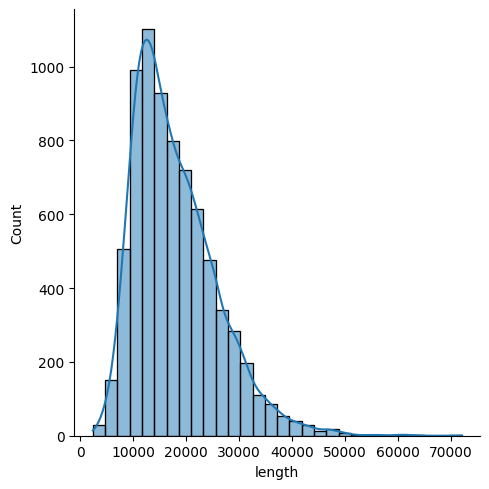

In [9]:
import seaborn as sns
#Definimos una gráfica simple para mostrar la longitud de los discursos
#plt.figure(figsize=(8, 2))
sns.displot(df['length'], bins=30, kde=True);

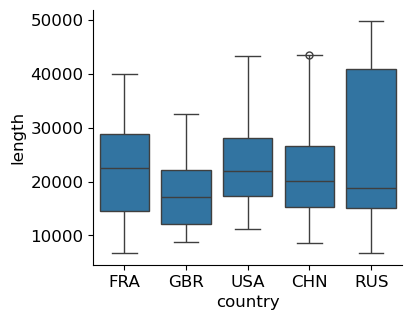

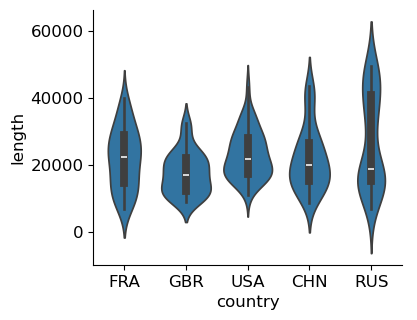

In [ ]:
#Definimos que países del dataset queremos tener en cuenta para las gráficas
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])

#Gráfica de caja
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(4, 3)
g.fig.set_dpi(100) 

#Gráfica violín
g = sns.catplot(data=df[where], x="country", y="length", kind='violin')
g.fig.set_size_inches(4, 3)
g.fig.set_dpi(100) 

Se pueden usar una gran cantidad de gráficas disponibles a través de las diversas librerías, no me voy a detener a mostrar cada una de ellas, pues cuando sea realmente necesario se decidirá qué gráfica es la que mejor se adapta al resultado que se desea mostrar.

# Creación de un Pipeline de preprocesamiento de texto

## Tokenización con expresiones regulares
La tokenización es utilizada para extraer palabras de secuencias de caracteres de cualquier longitud. Para esto se hará uso de expresiones regulares.

En este ejemplo se utilizarán expresiones en formato POSIX para extraer expresiones que cuenten con al menos una letra, precedida o seguida de algún carácter alfanumérico.

In [ ]:
import regex as re

def tokenize(text):
    #\p{L} -> al menos una letra
    #[\w-]* -> 0 o + caracteres alfanuméricos
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

#Ejemplo para comprobar funcionamiento
text = "La tokenización-extracción de palabras de un texto/frase funciona"
tokens = tokenize(text)
print("|".join(tokens))

La|tokenización-extracción|de|palabras|de|un|texto|frase|funciona


## Utilización de Stop Words
Las Stop Words son aquellas que tienen una frecuencia demasiado elevada en cualquier tipo de texto, por ejemplo, pronombres, adverbios, artículos, etc.

Este tipo de palabras se eliminan antes del análisis de datos pues no aportan ningún tipo de información relevante a la hora de la verdad.

Se utilizará la lista de stop words ofrecida por la librería NLTK en este ejemplo, pero hay muchas listas disponibles con una gran variedad de palabras. Además, es posible la edición de estas listas pudiendo añadir o eliminar palabras que el usuario considere necesarias, y si cuenta con el sufiente tiempo y ganas, se puede crear su propia lista uno mismo.

In [ ]:
import nltk

#Descargamos la lista de stop words
nltk.download('stopwords')
#Establecemos el uso de stop words en inglés
stopwords = set(nltk.corpus.stopwords.words('english'))

#eliminamos las stop words de la lista de la frase tokenizada
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

#se pueden incluir/eliminar stop words adicionales no preestablecidos
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

print(stopwords)

{'been', 'and', 'now', 'ma', 'wouldn', 'some', 'only', 'between', 'doing', 'd', 'must', 'so', 'too', 'no', 've', 'for', 'me', 'can', 'herself', 'haven', "doesn't", 'to', 'having', 'more', 'weren', 'those', 'off', 'you', 'than', 'dear', 'same', 'before', 'itself', 'he', 'didn', 'when', 'again', "didn't", "haven't", "hasn't", 'being', 'both', 'doesn', 'its', 'needn', 'ours', 'with', 'would', 'your', 'yours', 'shan', 'below', 'while', 'am', 'through', 'up', 'hers', 'won', 'my', 'y', 'is', 'll', 'ain', 'they', 'isn', 'few', 'regards', 'himself', 't', 'what', "aren't", 'ourselves', 'until', 'yourselves', 'not', 'just', 'whom', "weren't", 'should', 'o', 's', 'i', 'have', 'yourself', "she's", 'about', 'couldn', 'hadn', "mightn't", 'other', 'at', "it's", 'each', "wouldn't", 'she', 'shouldn', 'it', 'because', 'in', 'over', 're', 'did', 'this', 'or', 'an', 'myself', 'are', "should've", "shouldn't", 'down', "that'll", "couldn't", 'hasn', 'how', 'mustn', 'do', 'we', 'above', 'if', 'aren', 'him', '

[nltk_data] Downloading package stopwords to /home/diego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Pipeline simple
Se creará una nueva columna en el dataset llamada "tokens" que contendrá el texto tokenizado, en minúsculas y sin stop words.

Un pipeline es utilizado para básicamente unir las funciones explicadas en los ejemplos anteriores y realizar todo el proceso en unas pocas líneas de código, y si se desea realizar más acciones sobre los datos, simplemente vale con extender el pipeline con más funcionalidades.

In [ ]:
#Declaramos el pipeline
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    
    for transform in pipeline:
        tokens = transform(tokens)
    
    return tokens

In [ ]:
#Ejecutamos el pipeline sobre los datos del archivo del principio
df['tokens'] = df['text'].progress_apply(prepare, pipeline=pipeline)

100%|██████████| 7507/7507 [00:26<00:00, 282.65it/s]


In [ ]:
df['num_tokens'] = df['tokens'].progress_map(len)

100%|██████████| 7507/7507 [00:00<00:00, 528574.26it/s]



# Contando palabras
Podemos contar el número de veces que aparece una palabra/token a través de la clase Counter de python, mostrando como resultado la palabra como clave y la frecuencia de aparición como valores.

In [ ]:
from collections import Counter

#Ejemplo de conteo de palabras con frase simple
tokens = tokenize("La ciberseguridad es importante, pero más importante que la ciberseguridad es la salud.")

counter = Counter(tokens)
print(counter)

Counter({'ciberseguridad': 2, 'es': 2, 'importante': 2, 'la': 2, 'La': 1, 'pero': 1, 'más': 1, 'que': 1, 'salud': 1})


Esta lista de contadores puede ser actualizada en cualquier momento con nuevas entradas de texto

In [ ]:
more = tokenize("Manuel prefiere la ciberseguridad a la salud.")
counter.update(more)
print(counter)

Counter({'la': 4, 'ciberseguridad': 3, 'es': 2, 'importante': 2, 'salud': 2, 'La': 1, 'pero': 1, 'más': 1, 'que': 1, 'Manuel': 1, 'prefiere': 1, 'a': 1})


Se pueden también encontrar las palabras con más frecuencia de aparición en un corpus y mostrarlas por pantalla o trabajar con ellas.

In [ ]:
counter = Counter()
mst_comm = df['tokens'].map(counter.update)

#se muestran las 5 palabras con frecuencia más alta del corpus
pp.pprint(counter.most_common(5))

[('nations', 124508),
 ('united', 120763),
 ('international', 117223),
 ('world', 89421),
 ('countries', 85734)]


Ahora, se verá como convertir el contador a un DataFrame de Pandas, que es un mejor formato para trabajar y estudiar los datos extraídos.

En este caso, los tokens conformarán el índice del DataFrame y la frecuencia de aparición de cada uno se almacenará en la columna "freq", la cuál se ordenará en orden de mayor frecuencia a menor.

In [ ]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    #procesa los tokens y actualiza el contador
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    #crea el contador y recorre todos los datos
    counter = Counter()
    df[column].progress_map(update)

    #transforma el contador a dataframe
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

#ejecución de la func. count_words y muestra por pantalla de las 5 primeras
freq_df = count_words(df)
freq_df.head(5)

100%|██████████| 7507/7507 [00:02<00:00, 2836.06it/s]


,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


# Frecuencia Inversa del Documento
La frecuencia inversa del documento, IDF (siglas en inglés) es una forma de mostrar la inusualidad de algunos términos del corpus.

Esto es útil para el análisis de los datos pues se reduce la influencia de términos que aparecen con cierta frecuencia y se resaltan aquellas que pueden pasar más desapercibidas, pero que pueden tener un mayor peso en el contexto del estudio.

Este método es similar al conteo de palabras, pero en este caso cada token se tiene en cuenta una vez por documento para luego computar los valores IDF.

In [ ]:
##No he conseguido instalar wordcloud en mi pc por problemas con el gestor
#de paquetes yay que se usa en los sistemas basados en Arch Linux

##Por ahora, el código es prácticamente idéntico al ejemplificado en el libro
#y en el momento que pueda reparar los problemas con el gestor trataré de ejecutarlo
#y ver su funcionamiento correctamente
 
from wordcloud import WordCloud

def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    #conteo de tokens
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    counter = Counter()
    df[column].progress_map(update)

    #creación del data frame y cómputo IDF
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'

    return idf_df

idf_df = compute_idf(df)

#Samples de valores IDF
#Alto IDF -> término interesante
idf_df.sample(5)

#Mostrando los valores IDF a través de wordclouds tras añadir nuevas stopwords, 
#se pueden ver de manera más visible las palabras que se pueden tener en 
#mayor consideración a la hora del análisis
freq_1970 = count_words(df[df['year'] == 1970])
freq_2015 = count_words(df[df['year'] == 2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

plt.figure(figsize=(12,6))
# #wordcloud(freq_df['freq'], title='All years', subplot=(1,3,1))
plt.subplot(2,2,1)###
wordcloud(freq_1970['freq'], title='1970 - TF', 
          stopwords=['twenty-fifth', 'twenty-five'])
plt.subplot(2,2,2)###
wordcloud(freq_2015['freq'], title='2015 - TF', 
          stopwords=['seventieth'])
plt.subplot(2,2,3)###
wordcloud(freq_1970['tfidf'], title='1970 - TF-IDF', 
          stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])
plt.subplot(2,2,4)###
wordcloud(freq_2015['tfidf'], title='2015 - TF-IDF', 
          stopwords=['seventieth'])

ModuleNotFoundError: No module named 'wordcloud'

# Palabras clave según el contexto
En los nubes de palabras TF-IDF pueden aparecer términos cuyos significados no conocemos. Para evitar esto, se puede buscar el texto original en el que aparecen esos términos para observar el contexto de la frase y así tener una mejor noción del posible significado.

Para esto se hará uso de la función KWIC de la librería textacy por su rapidez gracias a que trabaja sobre texto no tokenizado.

Se utilizará una función similar a la siguiente para extender su uso para varios documentos pertenecientes a un mismo DataFrame.

In [ ]:
import textacy

from textacy.text_utils import KWIC

def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True, 
                              window_width=window, print_only=False))

    kwic_list = []
    doc_series.progress_map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))
            

random.seed(22) ###
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

ModuleNotFoundError: No module named 'thinc.backends.linalg'

# Analizando N-Grams
Existen una gran cantidad de palabras que están conformadas por la unión de otras palabras, ya sea mediante una unión directa, como es *motorcycle*, o unidas mediante guión, como *self-defense* (utilizo palabras en inglés porque en la gran mayoría de casos se van a procesar datos escritos en inglés, además de que las palabras unidas por guiones son más comunes en este idioma y ofrecen un mejor contexto para la comprensión de lo que se trata de explicar en este apartado).

Es por estos casos por los que se analizan los N-Grams, de este modo, dos tokens distintos pueden considerarse como una única unidad.

Partiendo de que n-grams de longitud igual a 1 son palabras únicas, para este análisis se suele trabajar con bigrams (longitud 2).

La función a continuación muestra como una secuencia de distintos tokens puede convertirse a bigrams.

In [ ]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

text = "Se vive una situación extrema en la Franja de Gaza"
tokens = tokenize(text)
print("|".join(ngrams(tokens, 2)))

NameError: name 'tokenize' is not defined

Como la mayoría de n-grams contienen *stop words*, como se ha visto en el ejemplo anterior, es recomendable excluirlas de la información a analizar para obtener unos resultados óptimos

In [ ]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

print("Bigrams:", "|".join(ngrams(tokens, 2, stopwords=stopwords)))
print("Trigrams:", "|".join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams: La ciberseguridad|ciberseguridad es|es importante|importante pero|pero más|más importante|importante que|que la|la ciberseguridad|ciberseguridad es|es la|la salud
Trigrams: La ciberseguridad es|ciberseguridad es importante|es importante pero|importante pero más|pero más importante|más importante que|importante que la|que la ciberseguridad|la ciberseguridad es|ciberseguridad es la|es la salud


Una vez hecho esto, podemos añadir una nueva columna a nuestro Data Frame que contenga todos los n-grams que se hayan analizado e incluirlos en el conteo de palabras, pudiendo así obtener los n-grams con más frecuencia del texto también.º

In [ ]:
df['bigrams'] = df['text'].progress_apply(prepare, pipeline=[str.lower, tokenize]) \
                          .progress_apply(ngrams, n=2, stopwords=stopwords)

count_words(df, 'bigrams').head(5)

100%|██████████| 7507/7507 [00:02<00:00, 3402.12it/s]


,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856
